In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [81]:
data = pd.read_csv('Telco-Customer-Churn.csv')

In [9]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
#Basic structure
print(f'number of rows and column: {data.shape}') 
print(data.info())
print(data.columns)

number of rows and column: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Pape

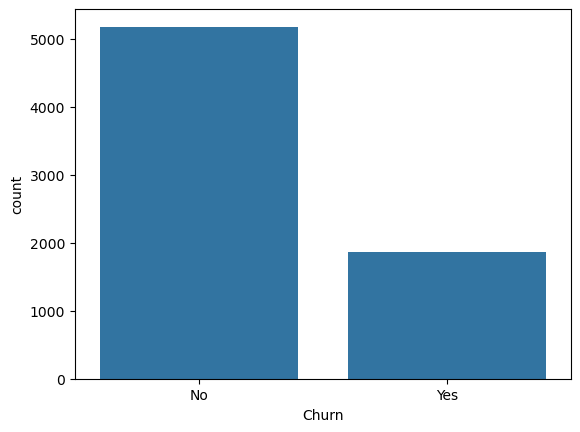

In [35]:
#univariate analysis
sns.countplot(x = 'Churn',data = data)
plt.show() #mostly customer are loyal and around 2000 left

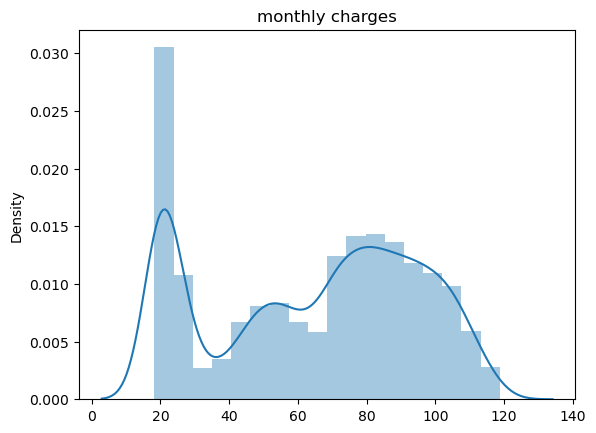

In [153]:
sns.distplot(x = data['MonthlyCharges'],kde = True)
plt.title('monthly charges')
plt.show() #mostly monthly charges are distributed between 40 and 120

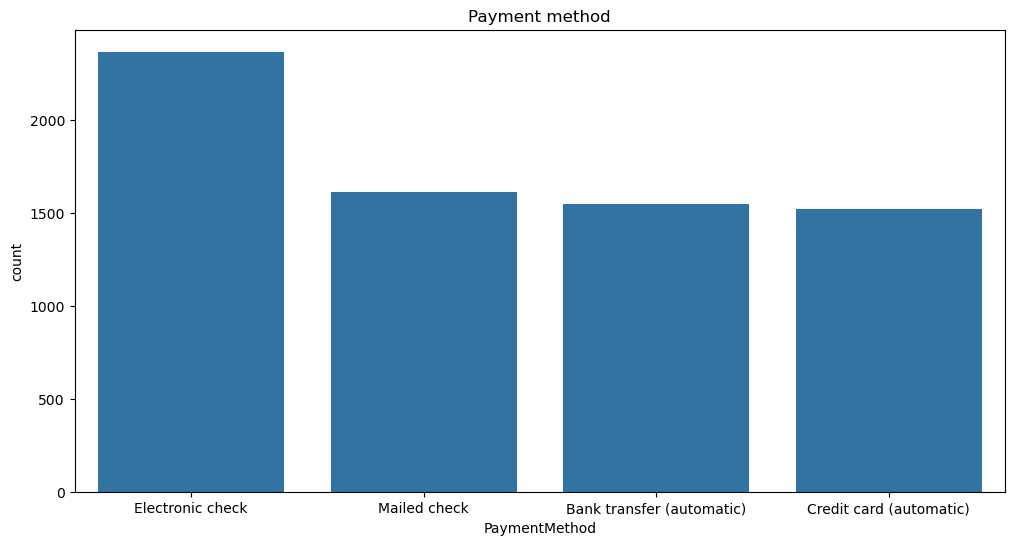

In [155]:
plt.figure(figsize = (12,6))
sns.countplot(x = data['PaymentMethod'])
plt.title('Payment method')
plt.show() #mostly payment is done by electronic check

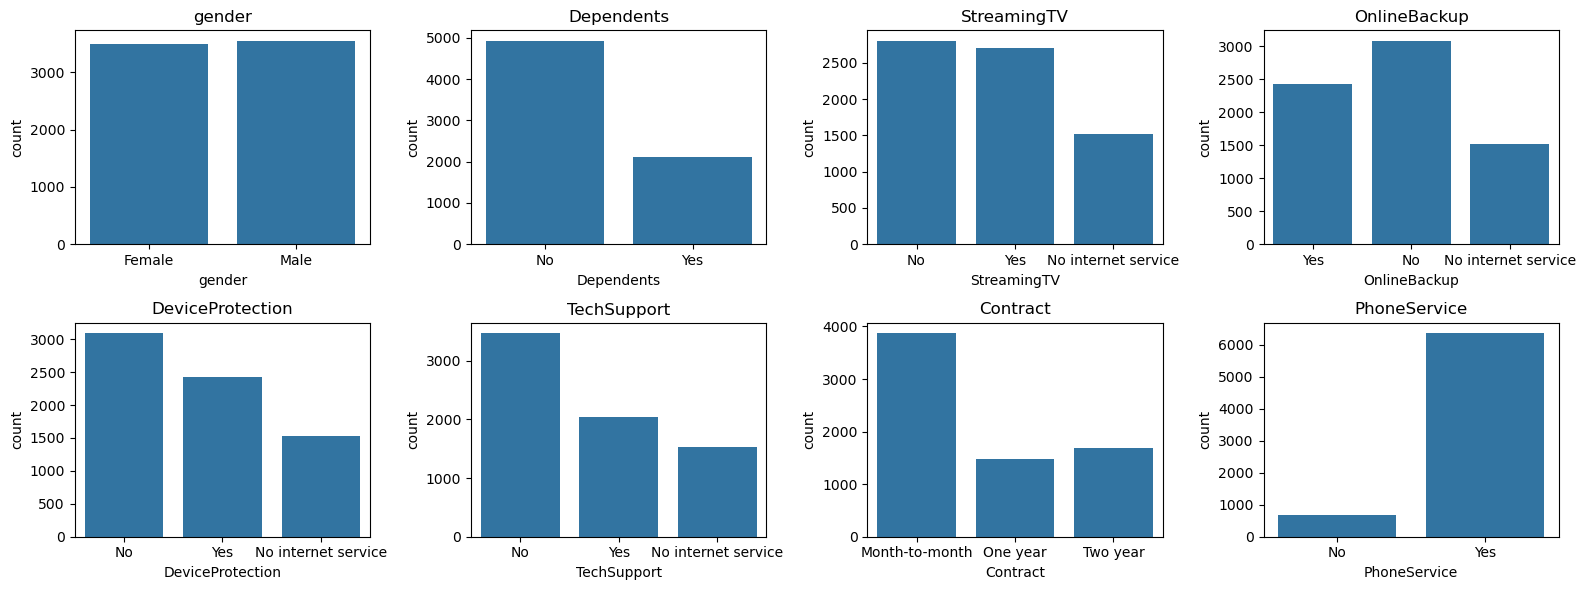

In [165]:
data.columns
col = ['gender','Dependents','StreamingTV','OnlineBackup', 'DeviceProtection', 'TechSupport','Contract','PhoneService']
nrow = 2
ncol = 4
iterator = 1
plt.figure(figsize = (16,6))
for i in col:
    plt.subplot(nrow,ncol,iterator)
    sns.countplot(x = i ,data =data)
    plt.title(i)
    iterator += 1
plt.tight_layout()
plt.show()

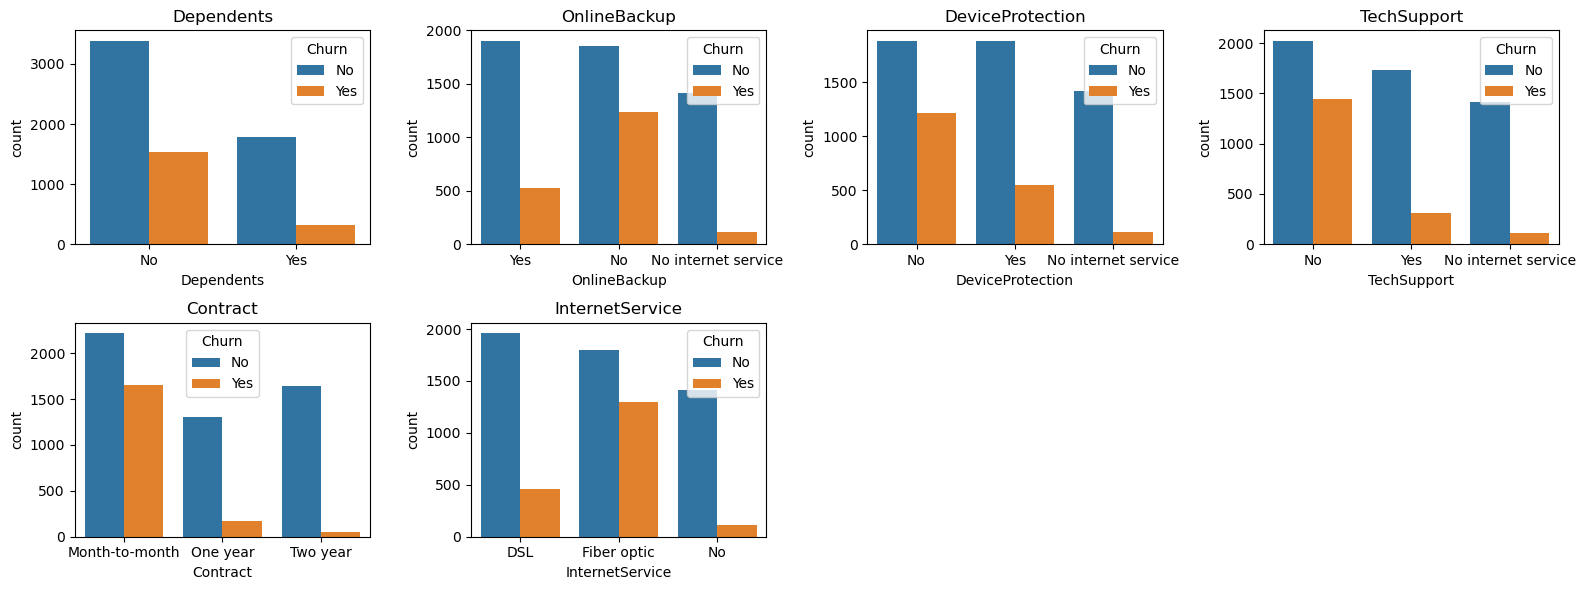

In [214]:
#bivariate analysis
col = ['Dependents','OnlineBackup', 'DeviceProtection', 'TechSupport','Contract','InternetService']
nrow = 2
ncol = 4
iterator = 1
plt.figure(figsize = (16,6))
for i in col:
    plt.subplot(nrow,ncol,iterator)
    sns.countplot(x = i ,hue = 'Churn',data =data)
    plt.title(i)
    iterator += 1
plt.tight_layout()
plt.show() 

In [ ]:
#inference about above graphs
#Dependent = people with no dependent are more likely to churn
#OnlineBackup = people having no onlineBackup are more likely to churn
#DeviceProtection = people with no DeviceProtection are more likely to churn
#TechSupport = people with no techsupport are more likely to churn
#contract = people with montly plans only are more likely to churn
#internet service = people with fiber optic internet service are more likely to churn

In [190]:
#missing values
data.isnull().sum()[data.isnull().sum() != 0] #no missing values in dataset

Series([], dtype: int64)

In [242]:
#creating new feature from tenure
def tenure_cat(x):
    if x<24:
        return 'new_customer'
    else:
        return 'old_customer'

In [244]:
data['tenure_group'] = data['tenure'].apply(tenure_cat)

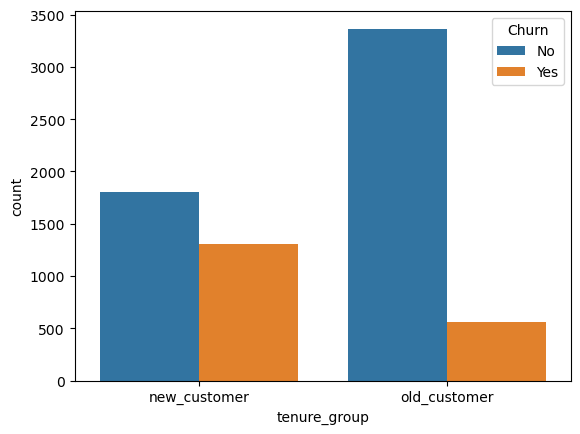

In [246]:
sns.countplot(x = 'tenure_group',hue = 'Churn',data = data)
plt.show() #new customers are more likely to churn. old_customer are loyal customers

In [264]:
#making new feature from internetserice as hasinternet
data['HasInternet'] = data['InternetService'].apply(lambda x: 'Yes' if x in ['DSL','Fiber optic'] else 'No')

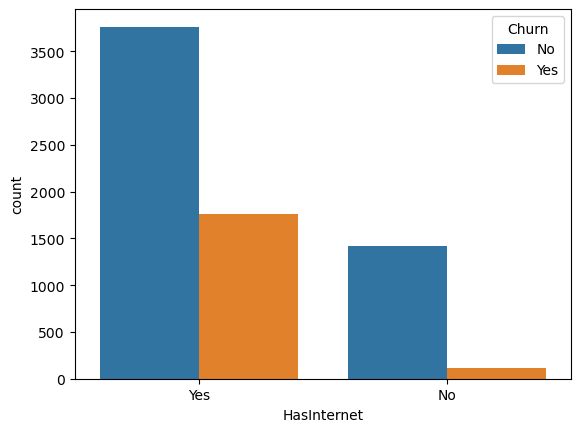

In [270]:
sns.countplot(x='HasInternet',hue = 'Churn',data = data)
plt.show() #people with internet are more likely to churn since they campare services and don't hesitate to cancel if dissatisfied.  

In [290]:
#new feature from senior citizen
data['Issenior'] = data['SeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')

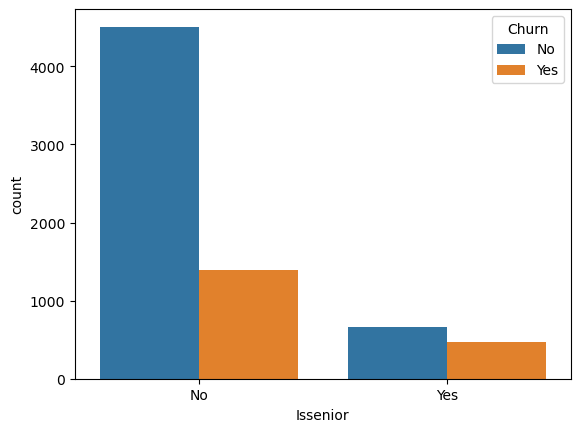

In [294]:
sns.countplot(x = 'Issenior',hue = 'Churn',data = data)
plt.show() #seniors are less likely to churn unless something goes wrong. reason could be anything like they are less like to explore competitors, and 
           #they might be on longer plans. they feel stable with one service, trust could be a big reason

In [308]:
#lets do hypothesis test on new features which we made 
#Churn Vs tenure_group
#since both are categorical column we will use chiSquare test

#ho: they both are independent
#ha: they are related
frequency = pd.crosstab(data['tenure_group'],data['Churn'])
t_stats,pvalue,dof,exp = stats.chi2_contingency(frequency)
if pvalue<0.05:
    print('reject the ho,they are related')
else:
    print('fail to reject ho')

reject the ho,they are related


In [312]:
#Churn Vs HasInternet

#ho: they both are independent
#ha: they are related
frequency = pd.crosstab(data['HasInternet'],data['Churn'])
t_stats,pvalue,dof,exp = stats.chi2_contingency(frequency)
if pvalue<0.05:
    print('reject the ho,they are related')
else:
    print('fail to reject ho')

reject the ho,they are related


In [316]:
#Churn Vs HasInternet

#ho: they both are independent
#ha: they are related
frequency = pd.crosstab(data['Issenior'],data['Churn'])
t_stats,pvalue,dof,exp = stats.chi2_contingency(frequency)
if pvalue<0.05:
    print('reject the ho,they are related')
else:
    print('fail to reject ho')

reject the ho,they are related


In [ ]:
data.to_csv('changed_telco.csv',index=False)